<a href="https://colab.research.google.com/github/AishwaryaVelumani/Hello-FOSS-ML/blob/master/MNIST_CNN_AV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Set up

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt

# Prepare the data

11493376/11490434 [==============================] - 0s 0us/step
xtr shape: (60000, 28, 28, 1)
xte shape: (10000, 28, 28, 1)


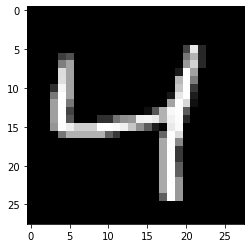

In [ ]:
# model/data parameters
num_classes=10
input_shape=(28,28,1)

# data split into train and test sets
(xtr,ytr),(xte,yte)= keras.datasets.mnist.load_data()

#scale images to [0,1] range
xtr= xtr.astype("float32")/255
xte= xte.astype("float32")/255

#make sure images have shape (28,28,1)
xtr= np.expand_dims(xtr,-1)
xte= np.expand_dims(xte,-1)

print("xtr shape:", xtr.shape)
print("xte shape:", xte.shape)

img= xtr[2]
img= np.array(img,dtype='float')
pix= img.reshape((28,28))
plt.imshow(pix,cmap='gray')
plt.show()

In [ ]:
#convert class vectors to binary class matrices
ytr= keras.utils.to_categorical(ytr,num_classes)
yte= keras.utils.to_categorical(yte,num_classes)

# Build the model

In [ ]:
model= keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(32,kernel_size=(3,3),activation="relu"),
        layers.MaxPooling2D(pool_size=(2,2)),
        layers.Conv2D(64,kernel_size=(3,3),activation="relu"),
        layers.MaxPooling2D(pool_size=(2,2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(num_classes,activation="softmax")
    ]
)

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1600)              0         
_________________________________________________________________
dropout (Dropout)            (None, 1600)              0         
_________________________________________________________________
dense (Dense)                (None, 10)                1

# Train the model

In [ ]:
batch_size=128
epochs=10

model.compile(loss="categorical_crossentropy",optimizer="adam",metrics=["accuracy"])

model.fit(xtr,ytr,batch_size=batch_size,epochs=epochs,validation_split=0.1)

Epoch 1/10
422/422 [==============================] - 41s 97ms/step - loss: 0.3691 - accuracy: 0.8875 - val_loss: 0.0783 - val_accuracy: 0.9788
Epoch 2/10
422/422 [==============================] - 42s 99ms/step - loss: 0.1092 - accuracy: 0.9671 - val_loss: 0.0522 - val_accuracy: 0.9860
Epoch 3/10
422/422 [==============================] - 41s 98ms/step - loss: 0.0805 - accuracy: 0.9753 - val_loss: 0.0457 - val_accuracy: 0.9867
Epoch 4/10
422/422 [==============================] - 40s 95ms/step - loss: 0.0688 - accuracy: 0.9786 - val_loss: 0.0450 - val_accuracy: 0.9877
Epoch 5/10
422/422 [==============================] - 41s 97ms/step - loss: 0.0604 - accuracy: 0.9811 - val_loss: 0.0379 - val_accuracy: 0.9907
Epoch 6/10
422/422 [==============================] - 41s 96ms/step - loss: 0.0564 - accuracy: 0.9828 - val_loss: 0.0380 - val_accuracy: 0.9895
Epoch 7/10
422/422 [==============================] - 41s 96ms/step - loss: 0.0507 - accuracy: 0.9842 - val_loss: 0.0353 - val_accuracy:

# Evaluate the trained model

In [ ]:
score= model.evaluate(xte,yte,verbose=1)
print("Test loss: ",score[0])
print("Test accuracy: ",score[1])

313/313 [==============================] - 3s 10ms/step - loss: 0.0245 - accuracy: 0.9917
Test loss:  0.024481039494276047
Test accuracy:  0.9916999936103821


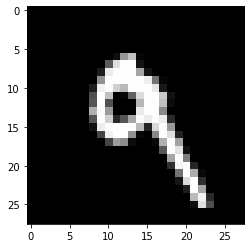

[9]


In [ ]:
img= xte[7]
img= np.array(img,dtype='float')
pix= img.reshape((28,28))
plt.imshow(pix,cmap='gray')
plt.show()

img= img.reshape(1,28,28,1)
img= img.astype('float32')
pred= model.predict_classes(img)
print(pred)